### k-최근접 이웃 회귀
- k-최근접 이웃 분류
    - 예측하려는 샘플에 가장 가까운 이웃을 k개를 선택
    - 이웃들의 클래스를 확인
    - 샘플 주변의 다수의 클래스를 샘플의 클래스로 예측
- k-최근접 이웃 회귀
    - 예측하려는 샘플에 가장 가까운 이웃 k개를 선택
    - 이웃의 평균을 구함

##### 데이터 준비
- 농어(perch)의 길이로 무게를 잘 예측할 수 있을까?

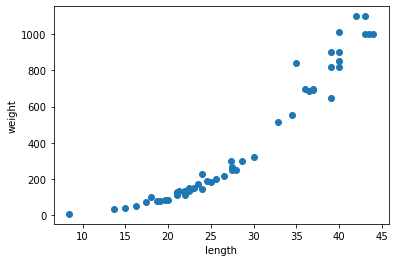

In [2]:
import	numpy as	np
import	matplotlib.pyplot as	plt

perch_length =	np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,	
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,	
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,	
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,	
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,	
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])
perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,	
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,	
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,	
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])
#	산점도 확인
plt.scatter(perch_length,	perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트와 테스트 세트 준비
§ train_test_split() 함수 사용
• 1개의 데이터 세트(perch_length)만 사용
• scikit-learn의 훈련 세트는 2차원 배열을 사용
– 입력 데이터 세트를 2차원 배열 형태로 변경이 필요
– reshape(row,	col) 함수 사용
– (42,) -> (42, 1)형태로 변경

In [3]:
from sklearn.model_selection import train_test_split

train_input,	test_input,	train_target,	test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

print(train_input.shape,	test_input.shape)

#	reshape(-1,	1):	-1:	행의 크기를 자동 지정
train_input=train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input=test_input.reshape(-1, 1) # 2차원 배열로 변경\

print(train_input.shape,	test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


#### k-최근접 이웃 회귀 알고리즘 정확도 계산
- k-최근접 이웃 회귀 알고리즘
    - KNeighborsRegressor 클래스 사용
- n_neighbors: 기본 값=5

- score()
    - 결정 계수(R2)를 리턴함
    - 출력하는 값이 높을수록 정확도가 높음

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
# 모델 훈련
knr.fit(train_input, train_target)

#	score():	훈련 모델 점수 확인,	결정 계수(R2)를 리턴
print(knr.score(test_input,	test_target))
# 0.992809406101064 => 결정계수

0.992809406101064


##### 결정 계수(R2)
- 결정 계수 (R2) 값</br>
    • 회귀식이 얼마나 정확한지를 나타내는 숫자 (0 ≤ $R^2$ ≤ 1)</br>
    – 0에 가까울수록, 회귀식의 정확도는 낮음</br>
    – 1에 가까울 수록, 회귀식의 정확도는 높음</br>

- $R^2$ = 1 − $(target − 예측)^2$의 합 / $(target - target평균)^2$의 합


#### mean_absolute_error
- mean_absolute_error (MAE): 평균 절대 오차</br>
• 타킷(실제 값)과 예측 값의 절대값 오차 평균</br>
• 절대값을 사용: 에러의 크기를 반영</br>
• sklearn.merics 패키지 포함

In [5]:
from	sklearn.metrics import	mean_absolute_error

#	테스트 세트에 대한 예측값 계산
test_prediction =	knr.predict(test_input)

#	테스트 세트에 대한 평균 절대 오차 계산
mae =	mean_absolute_error(test_target,	test_prediction)
print(mae) # 19.157142857142862 # 19g 정도의 오차 발생

19.157142857142862


### 과대적합 vs 과소적합

- 과대적합(Overfitting)</br>
• 훈련 세트에만 잘 맞는 모델</br>
– 테스트 세트에서는 점수가 굉장히 나쁨</br>
– 일반성이 떨어짐

- 과소적합(Underfitting)</br>
• 훈련 세트보다 테스트 세트의 점수가 높거나, 훈련 세트와 테스트 세트의 두 점수가 모두 낮음</br>
– 모델이 너무 단순해서 훈련 세트로 훈련이 되지 않은 경우

In [6]:
# - 앞 예제에서 훈련 세트와 테스트 세트의 score() 비교
# • 테스트 세트의 점수가 더 높음: 과소 적합(underfitting)

#	테스트 세트를 사용하여 R2값 계산
print(knr.score(test_input,	test_target))

#	훈련 세트 R2값 계산
print(knr.score(train_input, train_target))

# 0.992809406101064 > 0.9698823289099254 : 테스트 세트의 값 > 훈련 세트의 값
# => 테스트 세트의 점수가 더 높음: 과소 적합(underfitting)

0.992809406101064
0.9698823289099254


### 모델 개선: 이웃 개수 줄이기
- 과소 적합 해결 방안: 이웃의 개수 줄임</br>
    • 기본 값 5에서 n_neighbors =	3으로 변경</br>
    - 모델이 더 복잡해짐</br>
    - 훈련 세트의 국지적 패턴에 더 민감해짐

In [7]:
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

print("훈련 데이터로 모델의 정확도 점수 계산: ",
knr.score(train_input, train_target)) # 훈련 데이터의 점수가 5일때보다 높아짐.
print("테스트 데이터로 모델의 정확도 점수 계산: ",
knr.score(test_input, test_target))

훈련 데이터로 모델의 정확도 점수 계산:  0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산:  0.9746459963987609


#### 이웃의 수에 따른 그래프 비교
- k-최근접 회귀 알고리즘에서 이웃의 수 변경: 1, 5, 10</br>
• 농어의 길이를 5~45까지 변경하면서 무게 예측

c:\ProgramData\Miniconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


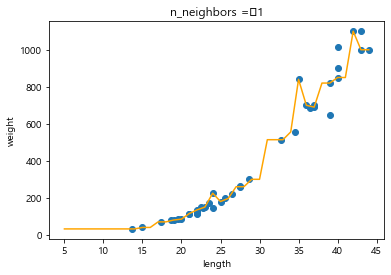

c:\ProgramData\Miniconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


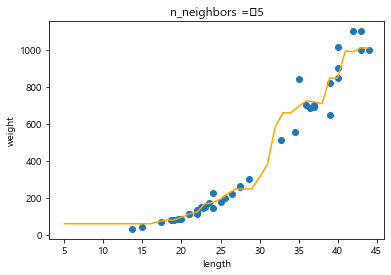

c:\ProgramData\Miniconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


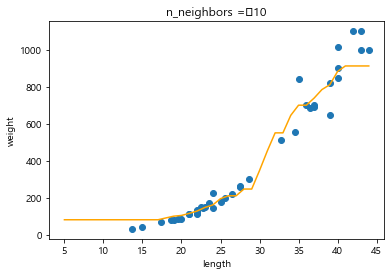

In [8]:
import platform
if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic')
elif platform.system()	==	'Darwin':	#	MacOS
    plt.rc('font',	family='AppleGothic')
else:
    plt.rc('font',	family='AppleGothic')

#	k-최근접 이웃 회귀 객체 생성
knr =	KNeighborsRegressor()

# x:농어의 길이(5 ~ 45까지 범위 설정)
x = np.arange(5, 45).reshape(-1, 1)

# n=1,	5,	10일때 예측 결과 그래프
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors=n
    knr.fit(train_input, train_target) # n_neighbors의 값을 1, 5, 10으로 증가시키면서 모델 훈련

    #	지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction=knr.predict(x)

    #	훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input,	train_target,	label='train	set')
    plt.plot(x,	prediction,	label='prediction',	color='orange')
    plt.title('n_neighbors =	{}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# n의 값이 커질수록 모델이 단순 (과소적합)

### 마무리 정리
- 회귀(Regression)</br>
    • 임의의 수치를 예측하는 문제</br>
    • k-최근접 이웃 회귀</br>
        – 가장 가까운 이웃 샘플을 찾고 타깃값을 평균하여 예측

- 과대 적합(Overfitting)</br>
    • 훈련 세트에만 잘 맞음 (일반성이 떨어짐)</br>
    • 훈련 세트의 성능 > 테스트 세트 성능

- 과소 적합(Underfitting)</br>
    • 모델이 단순하여 훈련 세트의 패턴을 모두 잡아내지 못함</br>
    • 훈련 세트와 테스트 세트의 성능이 모두 낮거나</br>
    • 훈련 세트의 성능 < 테스트 세트의 성능

## *k-최근접 이웃 알고리즘의 문제점*
- k-최근접 이웃 회귀 알고리즘의 문제점</br>
• 가장 가까운 샘플을 찾아 평균값 계산</br>
• 새로운 샘플이 훈련 세트의 범위를 벗어나면 잘못된 예측을 함

- 훈련 세트 밖의 샘플 예측</br>
• 50cm,	100cm	길이의 농어 무게 예측: 동일한 예측값

In [35]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

#	훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input =	train_input.reshape(-1,	1)
test_input =	test_input.reshape(-1, 1)

from	sklearn.neighbors import	KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print('50cm:',	knr.predict([[50]]))
print('100cm:',	knr.predict([[100]]))
# 100cm 농어의 예측값은 50cm 농어의 예측값과 동일: 1033g

50cm: [1033.33333333]
100cm: [1033.33333333]


##### 50cm,	100cm	길이의 농어의 이웃 및 산점도 비교

c:\ProgramData\Miniconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


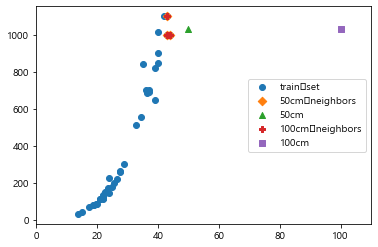

In [34]:
#	50cm	농어의 이웃을 구함
distances_50,	indexes_50	=	knr.kneighbors([[50]])
#	100cm	농어의 이웃을 구함
distances_100,	indexes_100	=	knr.kneighbors([[100]])

#	훈련 세트의 산점도
plt.scatter(train_input,	train_target,	label='train	set')

#	훈련 세트 중에서 50cm	농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50],	train_target[indexes_50],
marker='D',	label='50cm	neighbors')

#	50cm	농어 데이터
plt.scatter(50,	1033,	marker='^',	label='50cm')

#	훈련 세트 중에서 100cm	농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_100],	train_target[indexes_100],
marker='P',	label='100cm	neighbors')

#	100cm	농어 데이터
plt.scatter(100,	1033,	marker='s',	label='100cm')
plt.xlim(0,	110)
plt.legend(loc=5)
plt.show()

In [33]:
#  50cm 농어와 100cm 농어의 이웃 비교

# 훈련데이터에서 이웃 데이터의 인덱스 확인
print('50cm	neighbor	indexes:',	indexes_50)
print('100cm	neighbor	indexes:',	indexes_100)

# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

50cm	neighbor	indexes: [[34  8 14]]
100cm	neighbor	indexes: [[34  8 14]]
1033.3333333333333
1033.3333333333333


- k-최근접 이웃 회귀: 이웃의 평균을 구함</br>
    - 50cm 농어의 이웃과 100cm 농어의 이웃이 동일함</br>
    - 서로 다른 길이의 무게 예측하기 위해 이웃의 평균값을 사용했을 때</br>
    - 50cm 농어와 100cm 농어의 무게 예측값(1033g)이 동일한 문제점이 발생</br>